<a href="https://colab.research.google.com/github/decile-team/submodlib/blob/master/tutorials/Modelling_Capabilities_of_Regular_Submod_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [ ]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     |████████████████████████████████| 81kB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for submodlib: filename=submodlib-1.1.2-cp37-cp37m-linux_x86_64.whl size=491418 sha256=e276b946d271a7150e179c2babb63f7edbd9052b1904314ce11d3ac91dab0b27
  Stored in directory: /root/.cache/pip/wheels/5e/36/71/03a1ee62663b13c00b6e0159e5eb9a41df60b3fd2f7463f2c6
Successfully built submodlib


# Hand-crafted Data

To carefully observe the characteristics of the optimal set obtained by the maximization of these functions, we begin by creating a controlled dataset of 48 2D points as below. Specifically we have some clusters and some outliers in this dataset. We also create a different set (green points) whose representation may be desired. This is to demonstrate that this set need not be same as the ground set (whose subset is desired).

In [ ]:
import numpy as np
groundData =np.array( [(3,12.5), (4.5,13.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (15.5,6.5),
(7.5,10), (12.5,10), (10,12.5), (10,7.5), (8,12.5), (8,7.5), (14,12.5), (14,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]
repData =np.array( [(6.7,13.5), (7.2,13.5), (7.7,13.5), (16.7,13.5), (17.2,13.5), (17.7,13.5),
(6.7,13), (7.2,13), (7.7,13), (16.7,13), (17.2,13), (17.7,13),
(6.7,12.5), (7.2,12.5), (7.7,12.5), (16.7,12.5), (17.2,12.5), (17.7,12.5),
(6.7,7.5), (7.2,7.5), (7.7,7.5), (16.7,7.5), (17.2,7.5), (17.7,7.5),
(6.7,7), (7.2,7), (7.7,7), (16.7,7), (17.2,7), (17.7,7),
(6.7,6.5), (7.2,6.5), (7.7,6.5), (16.7,6.5), (17.2,6.5), (17.7,6.5)] )
repxs = [x[0] for x in repData]
repys = [x[1] for x in repData]

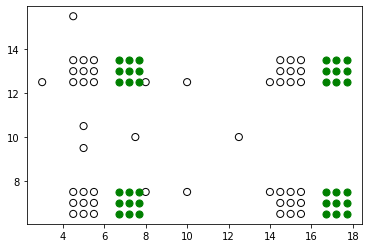

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(groundxs, groundys, s=50, color='black', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")

# Selection by Facility Location

Following the basic usage of functions as discussed in [Basic Usage](https://github.com/decile-team/submodlib/blob/master/tutorials/Different_Options_for_Usage.ipynb) we instantiate a [FacilityLocationFunction](https://submodlib.readthedocs.io/en/latest/functions/facilityLocation.html) object (in this particular case a dense similarity kernel will be created internally in C++) and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

[(42, 6.184049064060673), (41, 4.96527598798275), (30, 4.046274542808533), (12, 3.421319901943207), (27, 0.13208624720573425), (9, 0.13208624720573425), (36, 0.051087766885757446), (24, 0.051087766885757446), (18, 0.051087766885757446), (6, 0.051087766885757446)]


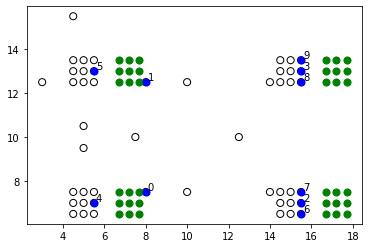

In [ ]:
from submodlib import FacilityLocationFunction
objFL = FacilityLocationFunction(n=48, data=groundData, separate_rep=True, n_rep=36, data_rep=repData, mode="dense", metric="euclidean")
greedyList = objFL.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

In case of FacilityLocation we observe that the cluster centers get picked up first followed by the other diverse oints in the data set and the outlier point is picked up only at the end. Had the budget been less than 10, the outlier wouldn't even have got picked up. This is expected as Facility Location primarily models **representation**. 

# Selection by Disparity Sum

Following the basic usage of functions as discussed in [Basic Usage](https://github.com/decile-team/submodlib/blob/master/tutorials/Different_Options_for_Usage.ipynb) we instantiate a [DisparitySumFunction](https://submodlib.readthedocs.io/en/latest/functions/disparitySum.html) object (in this particular case a dense similarity kernel will be created internally in C++) and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

[(47, 0.0), (36, 0.9963682889938354), (6, 1.9655494093894958), (45, 2.914377808570862), (40, 3.8598334789276123), (31, 4.7889745235443115), (39, 5.711325526237488), (0, 6.47794497013092), (38, 7.407852113246918), (42, 8.133478105068207)]


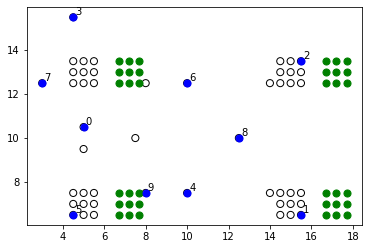

In [ ]:
from submodlib import DisparitySumFunction
objDM = DisparitySumFunction(n=48, data=groundData, mode="dense", metric="euclidean")
greedyList = objDM.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

In case of DisparitySum we observe that the remote corner points get picked up first followed by the other diverse points in the data set **including** the outlier point. This is expected as Disparity Sum primarily models **diversity** and wouldn't mind picking up outlier points if that makes the set diverse enough, compromising on the representativeness of the set with respect to the ground set.

# Selection by Feature Based (Logarithmic) Function

We instantiate a [FeatureBasedFunction](https://submodlib.readthedocs.io/en/latest/functions/featureBased.html) object using similarity with represented dataset as features and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

[(38, 16.434722443411196), (37, 11.102184604832757), (39, 8.392412143047865), (40, 6.815603830991634), (41, 5.540516492879213), (42, 4.7791973828692695), (43, 4.3094896877304425), (44, 3.705590472995942), (16, 3.2630099877842405), (22, 2.8963326805150786)]


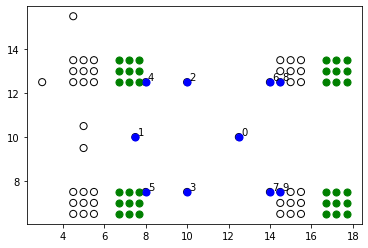

In [ ]:
from submodlib import FeatureBasedFunction
from scipy.spatial import distance
from submodlib_cpp import FeatureBased
distanceMatrix = distance.cdist(groundData, repData, 'euclidean')
similarityMatrix = 1-distanceMatrix
features = []
for i in range(48):
    #features.append(distanceMatrix[i].tolist())
    features.append(similarityMatrix[i].tolist())
objFB = FeatureBasedFunction(n=48, features=features, numFeatures=36, sparse=False, mode=FeatureBased.logarithmic)
greedyList = objFB.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

# Selection by GraphCut Function

Following the basic usage of functions as discussed in [Basic Usage](https://github.com/decile-team/submodlib/blob/master/tutorials/Different_Options_for_Usage.ipynb) we instantiate a [GraphCutFunction](https://submodlib.readthedocs.io/en/latest/functions/graphCut.html) object (in this particular case a dense similarity kernel will be created internally in C++) and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

[(42, 6.184049064060673), (41, 6.184049064060673), (30, 4.427680425811559), (12, 4.427680425811559), (24, 4.415696199517697), (18, 4.415696199517697), (27, 4.268065182608552), (9, 4.268065182608552), (21, 4.250156412133947), (15, 4.250156412133947)]
[(42, 5.184049064060673), (41, 5.019879067083821), (30, 3.361916780937463), (12, 3.2623426471836865), (27, 2.592191637144424), (9, 2.4926175033906475), (24, 1.6410975432954729), (18, 1.4769275463186204), (37, 1.2327216072008014), (33, 0.5146038598031737)]
[(42, 1.1840490640606731), (41, 0.36319907917641103), (30, -0.9011377985589206), (12, -1.3990084673278034), (33, -4.030699554306921), (3, -4.332673392666038), (38, -7.330223694443703), (0, -7.809042366483482), (45, -9.926403231424047), (34, -10.221439441898838)]


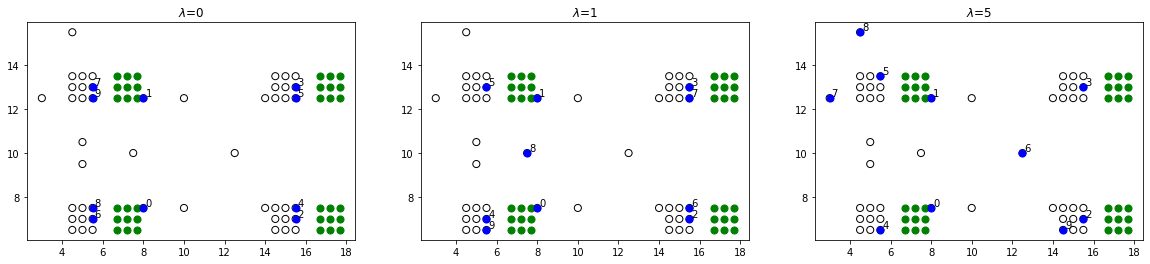

In [ ]:
from submodlib import GraphCutFunction
lambdas = [0, 1, 5]
index = 1
plt.figure(figsize = (20, 4))
for lambdaVal in lambdas:
  objGC = GraphCutFunction(n=48, mode="dense", separate_rep=True, n_rep=36, data_rep=repData, lambdaVal=lambdaVal, data=groundData, metric="euclidean")
  greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
  print(greedyList)
  greedyXs = [groundxs[x[0]] for x in greedyList]
  greedyYs = [groundys[x[0]] for x in greedyList]
  #plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
  plt.subplot(1, 3, index)
  plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
  plt.scatter(repxs, repys, s=50, color='green', label="Images")
  plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
  for label, element in enumerate(greedyList):
      plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
  plt.title('$\lambda$='+str(lambdaVal))
  index += 1

As can be seen from the mathematical representation of GraphCutFunction, $\lambda$ models the weight of penalty for picking similar items. Hence as $\lambda$ increases, GraphCut tends to select more diverse points while still being representative of the represented set.

# Selection by Set Cover Function

In [ ]:
import numpy as np
import random
from submodlib import SetCoverFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
obj = SetCoverFunction(n=num_samples, cover_set=cover_set, num_concepts=num_concepts)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

[(12, 10.0), (13, 5.0), (5, 3.0), (9, 1.0)]
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10) ✓
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4)
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5) ✓
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9)
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7) ✓
14 :  □□□□□□□■□□□□□□□□■□□□ (2)
Greedy Ordered List:  [(12, 10.0), (13, 5.0), (5, 3.0), (9, 1.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■■


# Selection by Probabilistic Set Cover Function

In [ ]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
obj = ProbabilisticSetCoverFunction(n=num_samples, probs=probs, num_concepts=num_concepts)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

[(8, 6.439999997615814), (2, 2.167100019538402), (7, 0.9882399646070601), (3, 0.26266774245371505)]
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75] ✓
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59]
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73] ✓
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62]
Greedy Ordered List:  [(8, 6.439999997615814), (2, 2.167100019538402), (7, 0.9882399646070601), (3, 0.26266774245371505)]
Probabilities of concepts covered by greedy set:  [1.0, 0.99, 0.99, 0.98, 0.98, 0.99, 0.99, 1.0, 0.93, 1.0]


# Selection by Disparity Min Function

[(47, 0.0), (36, 0.9963682889938354), (4, -0.025511503219604492), (40, -0.031966447830200195), (45, -0.019958198070526123), (39, -0.018702328205108643), (33, -0.03347498178482056), (38, -0.03746861219406128), (0, -0.0724029541015625), (37, -0.03638273477554321)]


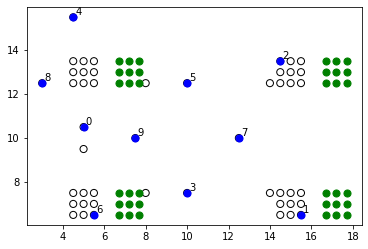

In [ ]:
from submodlib import DisparityMinFunction
objDM = DisparityMinFunction(n=48, data=groundData, mode="dense", metric="euclidean")
greedyList = objDM.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

# Selection by LogDeterminant Function

[(47, 0.0), (36, -1.3189420268109454e-05), (4, -0.0008954230819770973), (45, -0.006624785946759506), (40, -0.007138969343660629), (31, -0.02088370221273705), (39, -0.022004990050142125), (38, -0.07701037556308071), (0, -0.09154224737080935), (37, -0.13472371312243228)]
[(47, 0.0009995003330834232), (36, 0.0009863372523136694), (4, 0.00010586478705281379), (45, -0.005612018574082155), (40, -0.006125306058269001), (31, -0.019842841603893446), (39, -0.020962696939495616), (38, -0.07586216973983875), (0, -0.09035934070457577), (37, -0.1334597601506714)]
[(47, 0.09531017980432493), (36, 0.09529927946947182), (4, 0.09457011066199876), (45, 0.08983780818569097), (40, 0.08940281574520553), (31, 0.0780223170989438), (39, 0.07703386706544892), (38, 0.03125509558225519), (0, 0.0196590629813104), (37, -0.01650808946302613)]
[(47, 0.6931471805599455), (36, 0.6931438832211873), (4, 0.6929232204515701), (45, 0.691494248520986), (40, 0.6913475777987967), (31, 0.6878583983548511), (39, 0.68746660522480

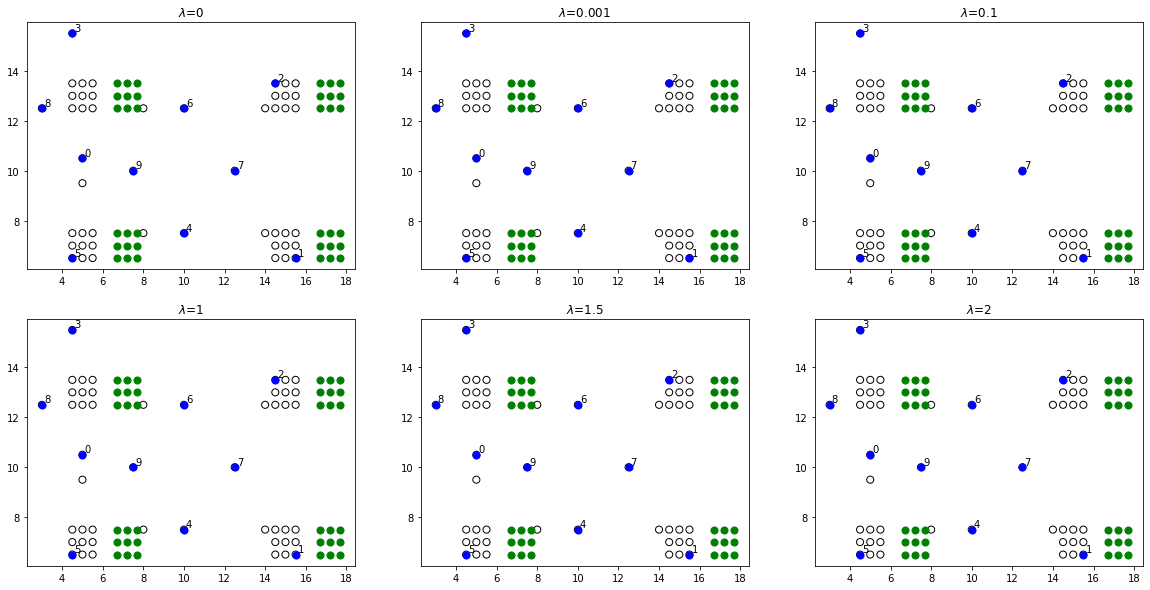

In [ ]:
from submodlib import LogDeterminantFunction
lambdas = [0, 0.001, 0.1, 1, 1.5, 2]
row = 0
index = 1
plt.figure(figsize = (20, 10))
for lambdaVal in lambdas:
  objLogDet = LogDeterminantFunction(n=48, data=groundData, mode="dense", 
                                     metric="euclidean", lambdaVal=lambdaVal)
  greedyList = objLogDet.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
  print(greedyList)
  greedyXs = [groundxs[x[0]] for x in greedyList]
  greedyYs = [groundys[x[0]] for x in greedyList]
  #plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
  plt.subplot(2, 3, 3*row+index)
  plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
  plt.scatter(repxs, repys, s=50, color='green', label="Images")
  plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
  for label, element in enumerate(greedyList):
      plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
  plt.title('$\lambda$='+str(lambdaVal))
  index += 1
  if index == 4:
    row +=1
    index =1

Role of $\lambda$ is only for numerical stability and it doesn't effect the behavior of LogDeterminant function in terms of selections.